<a href="https://colab.research.google.com/github/juanserrano90/codelatam/blob/main/SNIDSNspectra_juan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import sys
from os.path import isfile

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


In [211]:
!wget https://github.com/juanserrano90/codelatam/raw/main/data/sn_data.parquet


file_df_raw = "sn_data.parquet"
df_raw = pd.read_parquet(file_df_raw)

--2024-08-24 04:28:27--  https://github.com/juanserrano90/codelatam/raw/main/data/sn_data.parquet
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/juanserrano90/codelatam/main/data/sn_data.parquet [following]
--2024-08-24 04:28:28--  https://raw.githubusercontent.com/juanserrano90/codelatam/main/data/sn_data.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8258295 (7.9M) [application/octet-stream]
Saving to: ‘sn_data.parquet.5’

sn_data.parquet.5   100%[===================>]   7.88M  26.5MB/s    in 0.3s    

2024-08-24 04:28:28 (26.5 MB/s) - ‘sn_data.parquet.5’ saved [8258295/8258295]



In [212]:
df_raw.head()

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
df_raw.describe()

,SN Subtype ID,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,2518.69,2522.1,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
count,5001.000000,5001.000000,5001.000000,5001.0,5001.0,5.001000e+03,5001.000000,5001.000000,5001.000000,5001.000000,...,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000,5001.000000,5001.0,5001.0
mean,3.993201,0.655069,36.539334,0.0,0.0,7.998400e-07,0.000005,0.000010,0.000007,0.000019,...,0.000008,0.000093,0.000039,0.000055,0.000027,0.000024,0.00001,0.000005,0.0,0.0
std,5.162127,1.024109,88.017382,0.0,0.0,2.827296e-05,0.000130,0.000244,0.000330,0.000641,...,0.005317,0.004881,0.003690,0.002672,0.001601,0.001002,0.00043,0.000113,0.0,0.0
min,0.000000,0.000000,-82.700000,0.0,0.0,0.000000e+00,-0.002000,-0.003000,-0.008000,-0.005000,...,-0.059000,-0.038000,-0.059000,-0.021000,-0.012000,-0.008000,-0.00300,-0.001000,0.0,0.0
25%,0.000000,0.000000,-0.200000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
50%,1.000000,0.000000,11.900000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
75%,8.000000,1.000000,36.100000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
max,16.000000,3.000000,1103.000000,0.0,0.0,1.000000e-03,0.004000,0.009000,0.015000,0.025000,...,0.107000,0.153000,0.071000,0.052000,0.036000,0.022000,0.00900,0.002000,0.0,0.0


the data is stored in a somewhat bizzarro way, with the wavelength as the column name and the row as the SN

In [214]:
wavelength = np.array([float(c) for c in df_raw.columns[5:]])

In [215]:
wavelength.shape

(1024,)

In [216]:
df_raw.loc[(df_raw.index == "sn2008ar") * (df_raw["Spectral Phase"] == -2.7)]

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-2.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


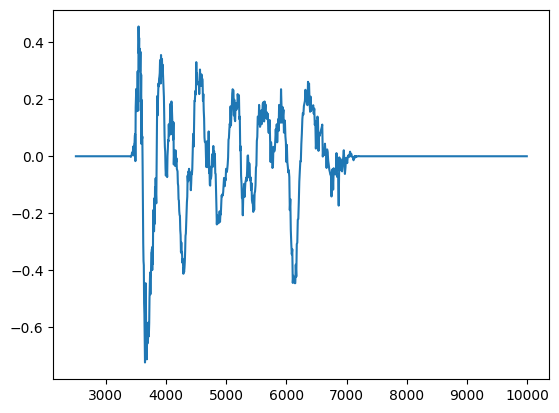

In [217]:
plt.plot(wavelength, df_raw.loc[(df_raw.index == "sn2008ar") * (df_raw["Spectral Phase"] == -2.7)].iloc[:, 5:].values[0])

# Explore data:

is there padding? invalid data, spurious entries?

### unique SN

In [218]:
print('Number of SNs:', len(df_raw.index.categories))

Number of SNs: 518


### unique SN subtypes

In [219]:
print('SN subtypes:', df_raw['SN Subtype'].unique())

SN subtypes: ['Ia-norm', 'Ia-91T', 'Ia-csm', 'Ia-91bg', 'Ib-norm', ..., 'Ic-broad', 'Ic-pec', 'IIn', 'Ibn', 'Ib-pec']
Length: 17
Categories (17, object): ['II-pec', 'IIL', 'IIP', 'IIb', ..., 'Ibn', 'Ic-broad', 'Ic-norm', 'Ic-pec']


In [220]:
subtypes  = df_raw['SN Subtype'].unique()

for i in subtypes:
  print(i)

Ia-norm
Ia-91T
Ia-csm
Ia-91bg
Ib-norm
Iax
Ia-pec
Ic-norm
IIP
IIL
IIb
II-pec
Ic-broad
Ic-pec
IIn
Ibn
Ib-pec


### unique SN main types

In [221]:
types = df_raw['SN Maintype'].unique()
print('Number of SN types:', len(types))
print('types:', list(types))

Number of SN types: 4
types: ['Ia', 'Ib', 'Ic', 'II']


In [222]:
# I want the name to be on the first column, reset index
df_raw = df_raw.reset_index()

### How many SNs of each type

In [223]:
grouped = df_raw.groupby(['SN Maintype', 'SN Name'], observed=True)['SN Name'].value_counts()

In [224]:
grouped.groupby(level=0, observed=True).count()

,count
SN Maintype,
II,11
Ia,414
Ib,46
Ic,47


In [225]:
grouped.index.levels[0].values

['II', 'Ia', 'Ib', 'Ic']
Categories (4, object): ['II', 'Ia', 'Ib', 'Ic']

### Typical series length (in time)

In [226]:
df_raw.groupby('SN Maintype', observed=True)['SN Maintype'].value_counts()

,count
SN Maintype,
II,494
Ia,3288
Ib,644
Ic,575


In [227]:
# group by object and calculate the typical series length
df_raw.groupby('SN Name', observed=True)['SN Name'].value_counts().sort_values(ascending=False)

,count
SN Name,
sn1987A,241
sn1993J,73
sn2005cf,67
sn2003du,60
sn1998S,57
...,...
sn1999da,1
sn2000bh,1
sn2000cu,1


In [228]:
df_raw.groupby('SN Name', observed=True)['SN Name'].value_counts().sort_values(ascending=False).mean()

9.654440154440154

In [229]:
# group by object and calculate the typical series length
series_length = (df_raw.groupby('SN Name', observed=True)['Spectral Phase'].max()-df_raw.groupby('SN Name', observed=True)['Spectral Phase'].min()).sort_values(ascending=False).mean()

print('Typical series length is:', series_length)

Typical series length is: 74.18314092664092


### NaNs?

In [230]:
df_raw.isna().sum().max()

0

In [231]:
print('number of nans:', df_raw.isna().sum().max())

number of nans: 0


In [232]:
df_raw.head()

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
sn2008ar = df_raw.loc[df_raw['SN Name'] == "sn2008ar"]
sn2008ar.shape

(18, 1030)

### Wavelength span

In [234]:
print(wavelength.min(), wavelength.mean(), wavelength.max())

2501.69 5410.10734375 9993.24


In [235]:
# usar 2500 a 10000
xlim = [2500, 10000]

### Flux span

In [236]:
df_raw.head()

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
print(df_raw.iloc[:,6:].mean().mean(), 3*df_raw.iloc[:,6:].std().std())

-0.00026101225067486555 6.807673554040658


In [238]:
# which rows have the max flux value?
print(df_raw.iloc[:,6:].max().max())
# which row is that?
print(df_raw.iloc[:,6:].max().idxmax())

2071.001
3301.9


In [239]:
df_raw.loc[df_raw['3301.9'] == 2071.001]

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
4631,iPTF13bvn,Ib-norm,6,Ib,1,-12.7,0.0,0.0,0.0,0.0,...,-0.053,-0.014,-0.027,-0.015,-0.003,-0.001,-0.001,0.0,0.0,0.0


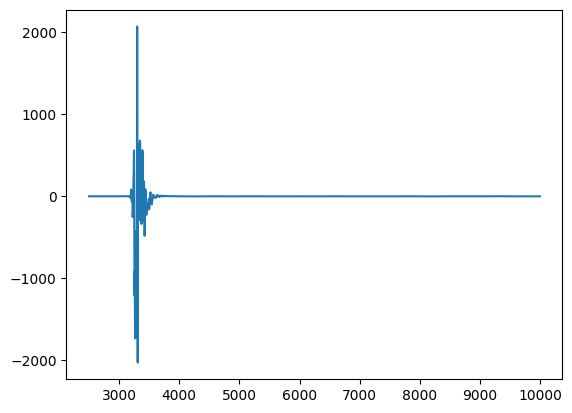

In [240]:
plt.plot(wavelength, df_raw.loc[df_raw['3301.9'] == 2071.001].values[0,6:])
#plt.xlim(3000,4000)

In [241]:
# remove that row
df_ = df_raw.drop(df_raw.loc[df_raw['3301.9'] == 2071.001].index)

In [242]:
print(df_.iloc[:,6:].mean().mean(), df_.iloc[:,6:].std().std())

0.002066028124999999 0.12497102525820329


In [243]:
df_.iloc[:,6:].max().sort_values(ascending=False)[0:20]

,0
4190.28,56.627
3537.93,54.727
4581.92,52.980
4195.95,47.553
4230.18,25.877
4600.57,22.404
3490.35,18.620
3664.68,16.329
4465.56,16.155
3315.34,15.685


In [244]:
print(df_.iloc[:,6:].min().min(), df_.iloc[:,6:].max().max())

-17.943 56.627


### Standarize in Y axis

In [245]:
# how?
# min max scaling (daniel)

$y_{scaled} = \frac{y-y_{min}}{y_{max}-y_{min}}$

In [246]:
# normalize each row substracting the mean and dividing by the std
df_.iloc[:,6:] = (df_.iloc[:,6:] - df_.iloc[:,6:].mean()) / (df_.iloc[:,6:].std())

In [247]:
# # normalize
# for i in range(df_raw.shape[0]):
#   df_raw.iloc[i] = (df_raw.iloc[:,6:] - df_raw.iloc[:,6:].min()) / (df_raw.iloc[:,6:].max() - df_raw.iloc[:,6:].min())

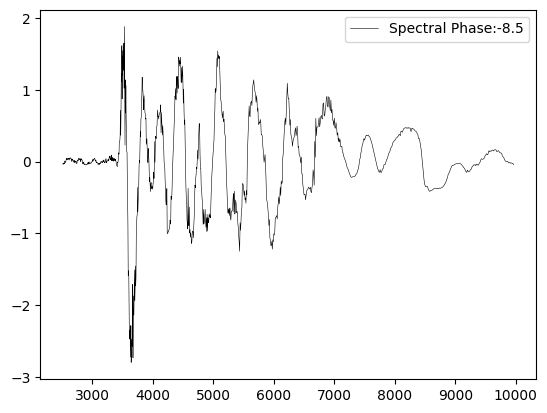

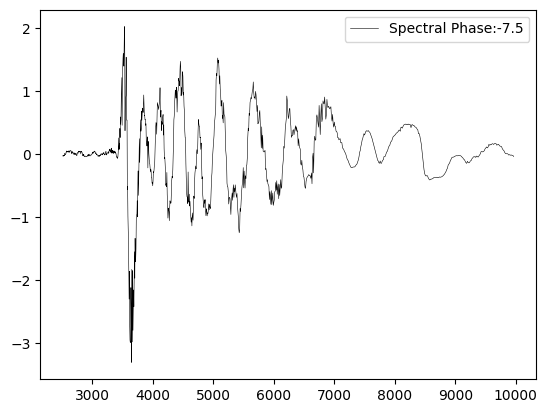

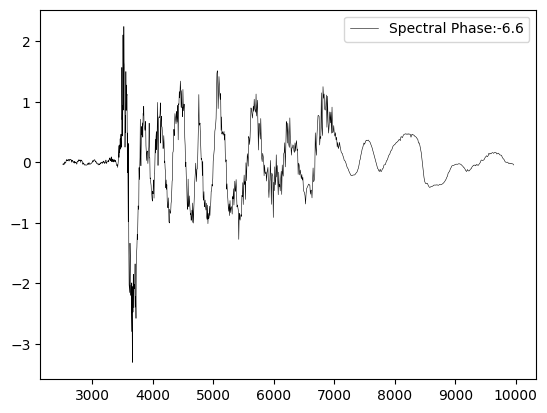

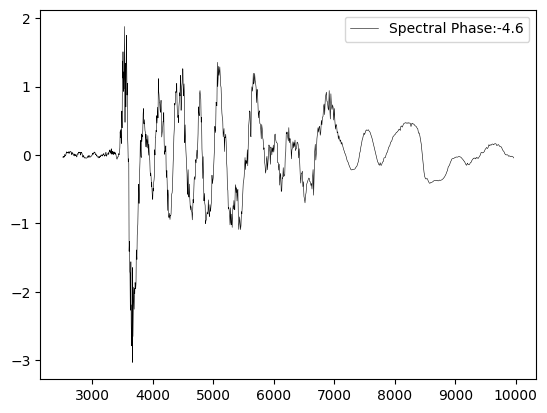

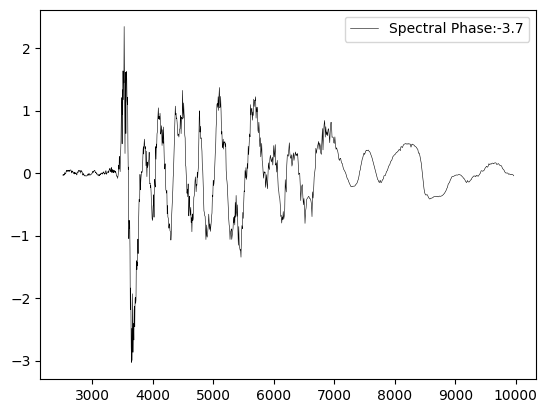

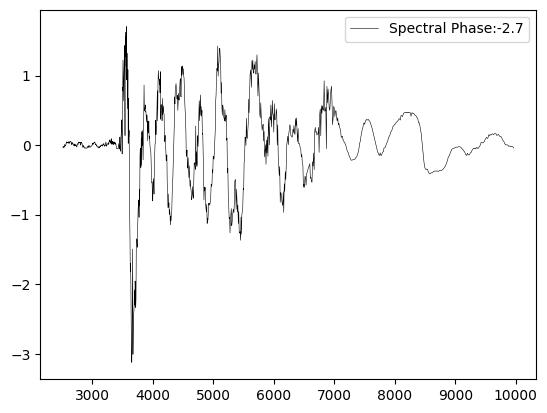

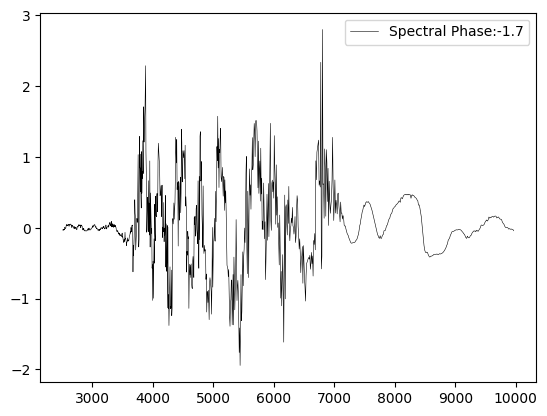

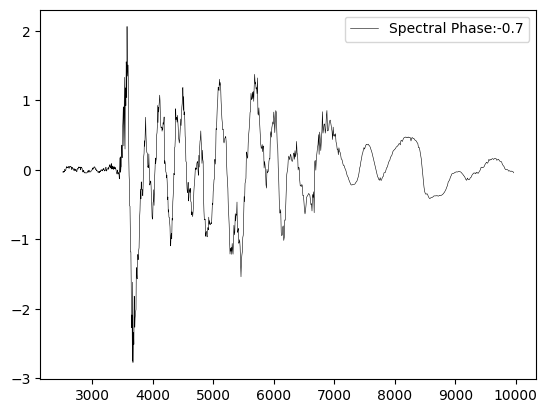

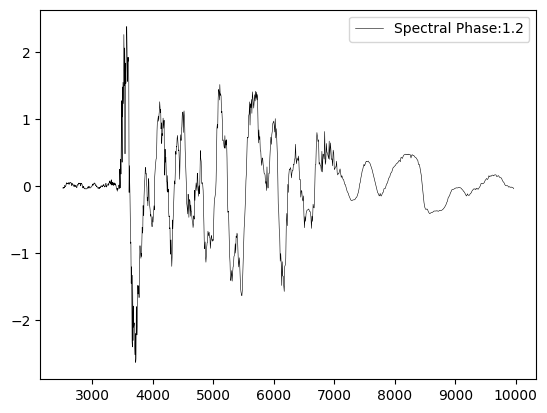

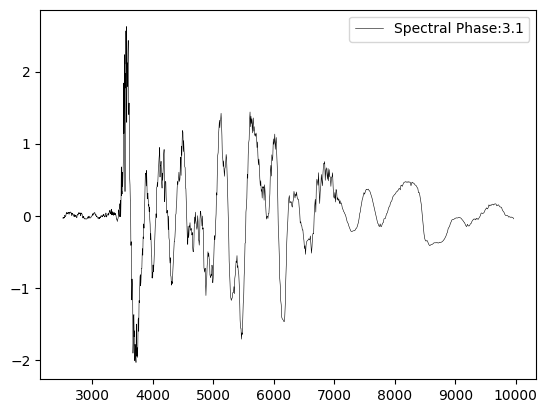

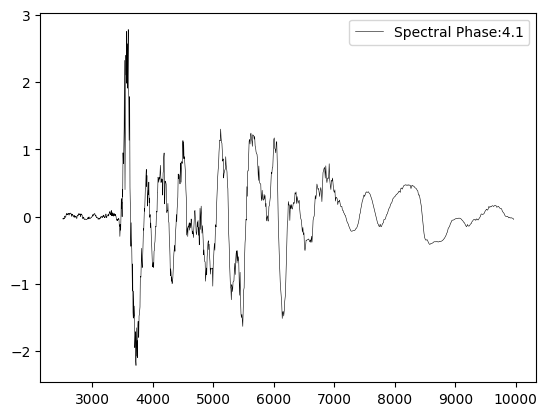

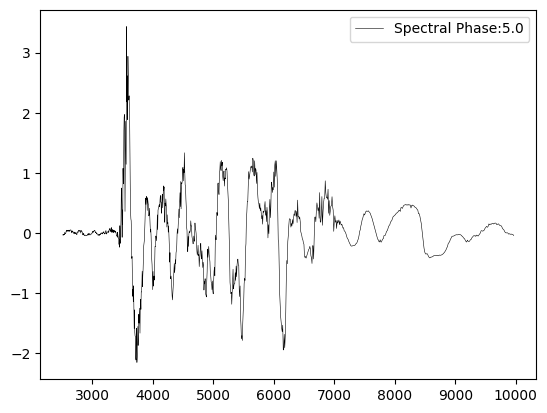

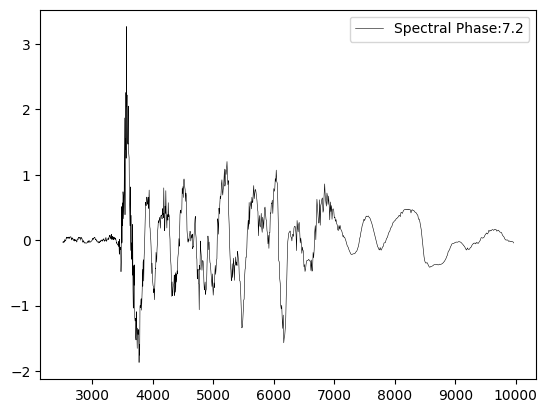

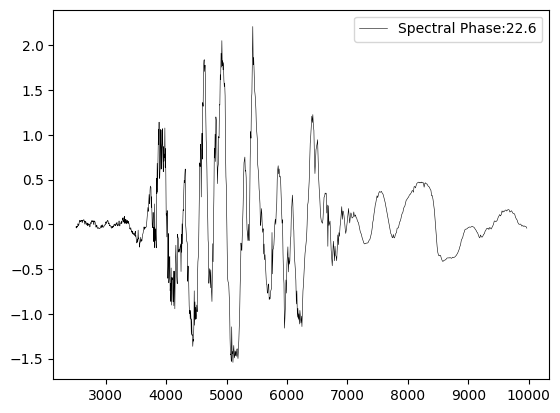

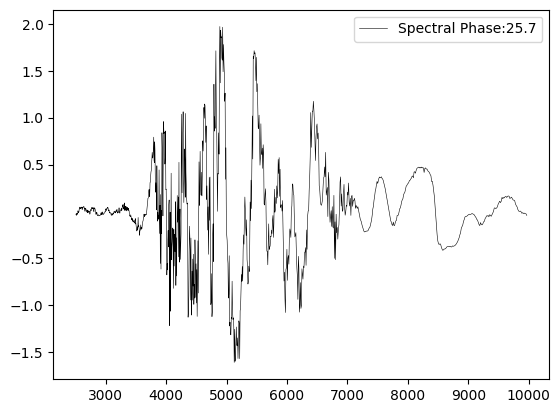

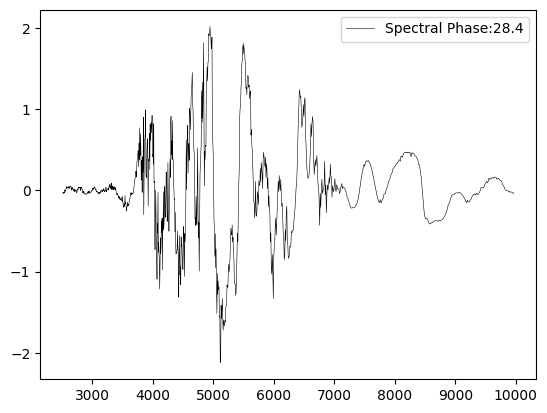

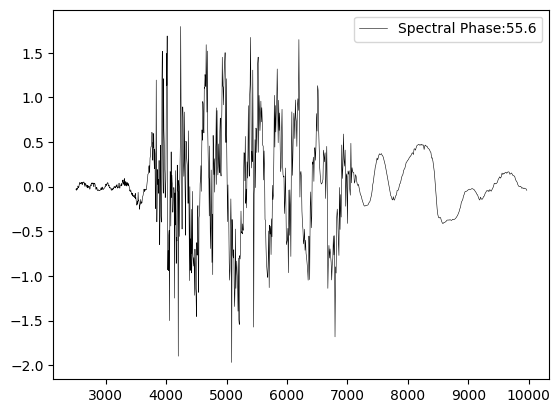

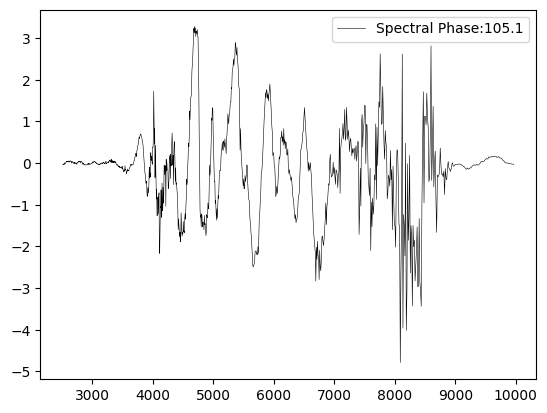

In [248]:
for i in range(18):
  plt.figure()
  plt.plot(wavelength, df_.iloc[:,6:].values[i], lw=0.4, ls='-', color='k',
           label='Spectral Phase:'+str(df_['Spectral Phase'].iloc[i]))
  plt.legend()

(2135.5935, 10339.0965, -3.0278706969125944, 2.1131588161389425)

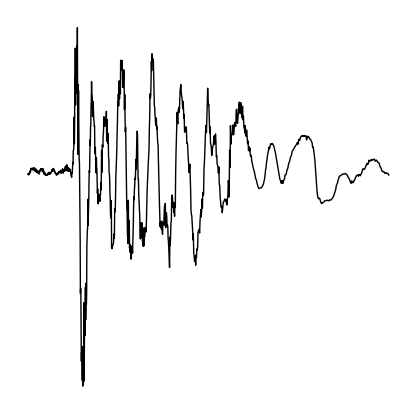

In [249]:
# plot a guardar
plt.figure(figsize=(5.12,5.12), dpi=100)
plt.plot(wavelength, df_.iloc[0,6:].values, lw=1, ls='-', color='k')
# remove the axis
plt.axis('off')
# plt.savefig('sn2008ar.png', bbox_inches='tight', dpi=100)

### Flux span now?

In [250]:
df_.head()

,SN Name,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,sn2008ar,Ia-norm,0,Ia,0,-8.5,NaN,NaN,-0.028293,-0.037055,...,-0.003533,-0.0196,-0.012149,-0.021622,-0.017124,-0.024164,-0.024223,-0.04246,NaN,NaN
1,sn2008ar,Ia-norm,0,Ia,0,-7.5,NaN,NaN,-0.028293,-0.037055,...,-0.003533,-0.0196,-0.012149,-0.021622,-0.017124,-0.024164,-0.024223,-0.04246,NaN,NaN
2,sn2008ar,Ia-norm,0,Ia,0,-6.6,NaN,NaN,-0.028293,-0.037055,...,-0.003533,-0.0196,-0.012149,-0.021622,-0.017124,-0.024164,-0.024223,-0.04246,NaN,NaN
3,sn2008ar,Ia-norm,0,Ia,0,-4.6,NaN,NaN,-0.028293,-0.037055,...,-0.003533,-0.0196,-0.012149,-0.021622,-0.017124,-0.024164,-0.024223,-0.04246,NaN,NaN
4,sn2008ar,Ia-norm,0,Ia,0,-3.7,NaN,NaN,-0.028293,-0.037055,...,-0.003533,-0.0196,-0.012149,-0.021622,-0.017124,-0.024164,-0.024223,-0.04246,NaN,NaN


In [251]:
# mean of mean of fluxes
print(df_.iloc[:,6:].mean().mean())
# mean of std of fluxes
print(df_.iloc[:,6:].std().mean())

-2.0689332600073482e-19
1.0


In [252]:
# which rows have the max flux value?
print(df_.iloc[:,6:].max().max())
# which row is that?
print(df_.iloc[:,6:].max().idxmax())

68.83335168651735
4190.28


(-100.0, 100.0)

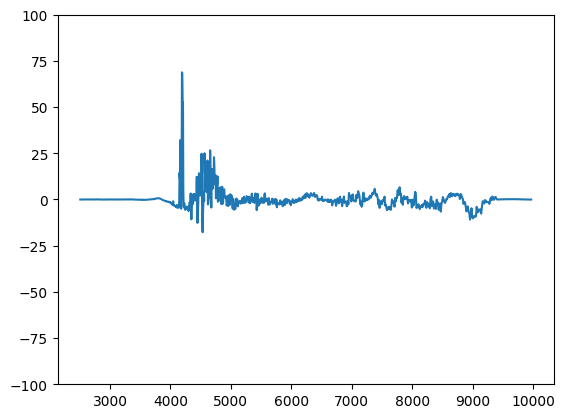

In [258]:
plt.plot(wavelength, df_.loc[df_['4190.28'] == 68.83335168651735].values[0,6:])
#plt.xlim(3000,4000)
plt.ylim(-100,100)